In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load dataset
We load the first 10,000 rows for speed.

In [2]:
df = pd.read_csv('data/some_cycles.csv')
df.drop(0, inplace=True) # Drop units row
df = df.apply(pd.to_numeric, errors='coerce')

## Preview first 3 cycles
Plot data.

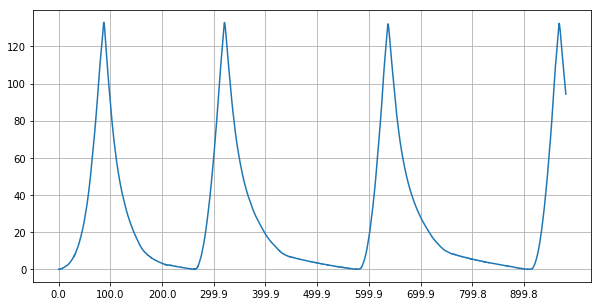

In [3]:
fig, ax = plt.subplots(figsize=(10,5));
ax.plot(df['Time'], df['Load']);
ax.grid(True);
ax.set_xticks(np.arange(0, df['Time'].max(), df.shape[0]/100));

## Identify extrema
Find local minima and maxima.

In [4]:
from scipy.signal import argrelextrema

In [5]:
minima = argrelextrema(df['Load'].values, comparator=np.less, order=100)[0]
maxima = argrelextrema(df['Load'].values, comparator=np.greater, order=100)[0]

## Label cycles in data
Cycles begin and end at each minimum.

In [6]:
col = np.zeros(shape=(len(df),), dtype=int)
for i in range(1, len(minima)):
    col[minima[i-1]:minima[i]] = i
df = df.assign(Cycle=pd.Series(col, index=df.index))

We show unique cycles in each data:

In [8]:
from matplotlib import cm

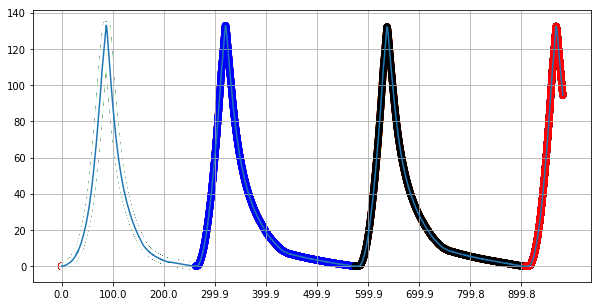

In [24]:
ax.scatter(df['Time'], df['Load'], c=df['Cycle'], cmap=cm.flag)
fig